In [72]:
import random, numpy as np, pandas as pd
from matplotlib import pyplot as plt
alphap = 2
probp = 0.75
expon = 2 * alphap - 1

In [73]:
def betadist(alpha):
    """gives a random number from beta distribution"""
    return random.betavariate(alpha,alpha)

In [74]:
def decision(probability):
    """
    decides with a given probability whether to keep the right part
    """
    if float(probability) > random.random():
        return True
    else: 
        return False

In [75]:
def splitting(segment):
    """
    splits a given segment. left and right are endpoints of the segment
    returns : 
        xL -> length of the left segment
        xR -> length of the right segment
        flag -> keeping the right segment
        xLp, xRp -> probability(unnormalized) for being selected
        change -> change of normalization const
    """
    xL = segment * betadist(alphap)
    xR = segment - xL
    flag = decision(probp)
    xLp = xL**expon
    xRp = xR**expon
    change = xLp + xRp - segment**expon
    return xL, xR, flag, xLp, xRp, change

In [76]:
def pickindex(frag_prob, frag_prob_sum):
    """
    picks up a segment to be subsequently split
    """
    r = random.uniform(0, frag_prob_sum)
    sum_ = 0
    for index in range(len(frag_prob)):
        sum_ += frag_prob[index]
        if sum_ < r:
            continue
        else:
            return index

In [77]:
def number_length(segment_lengths,flags):
    
    N = 0
    M = 0

    for i in range(len(flags)):
        if flags[i]:
            N += 1
            M += segment_lengths[i]
            pass
        pass
    return N, M

In [107]:
def realization_value(total_iteration, min_iteration, iteration_step):
    
    lengths = [1.]
    flags = [True]
    frag_prob = [1.] # raw probability, not normalized
    frag_prob_sum = 1.0 # normalization const

    iteration_list = list(range(min_iteration, total_iteration + 1, iteration_step))
    N_realization = []
    M_realization = []
    
    for i in range(total_iteration + 1):
        
        index = pickindex(frag_prob, frag_prob_sum)
        
        if flags[index] == True:

            xL, xR, flag, xLp, xRp, change = splitting(lengths[index])
            
            lengths[index] = xL
            lengths.append(xR)
            flags.append(flag)
            frag_prob[index] = xLp 
            frag_prob.append(xRp)
            frag_prob_sum += change
            pass
        
        if i+1 in iteration_list:
            N, M = number_length(lengths,flags)
            N_realization.append(N)
            M_realization.append(M)
        pass 
    
    N_list = np.array(N_realization)
    M_list = np.array(M_realization)
    
    return N_list, M_list

In [124]:
%timeit realization_value(10_000_000, 1_000_000, 1_000_000)

15.1 s ± 7.48 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [142]:
import time
t1 = time.time()
realization_value(10_000_000, 1_000_000, 1_000_000)
t2 = time.time()
run_time = t2 - t1
print("run_time is ", run_time, " sec")

run_time is  9.948976755142212  sec


In [139]:
def ensemble_average(total_iteration, min_iteration, iteration_step, ensemble_size):

    data_points = int ((total_iteration - min_iteration)/iteration_step + 1)
    N_ensemble = np.zeros(data_points)
    M_ensemble = np.zeros(data_points)
    
    for i in range(ensemble_size):
        if i % 1000 == 0:
            print("working with realization ",i)
        N_list, M_list = realization_value(total_iteration, min_iteration, iteration_step)
        N_ensemble += N_list
        M_ensemble += M_list
        pass
    
    N_average = N_ensemble/ensemble_size
    M_average = M_ensemble/ensemble_size
    
    return N_average, M_average

In [114]:
N_average, M_average = ensemble_average(100_000, 10_000, 10_000, 10_000)

working with realization  0
working with realization  100
working with realization  200
working with realization  300
working with realization  400
working with realization  500
working with realization  600
working with realization  700
working with realization  800
working with realization  900
working with realization  1000
working with realization  1100
working with realization  1200
working with realization  1300
working with realization  1400
working with realization  1500
working with realization  1600
working with realization  1700
working with realization  1800
working with realization  1900
working with realization  2000
working with realization  2100
working with realization  2200
working with realization  2300
working with realization  2400
working with realization  2500
working with realization  2600
working with realization  2700
working with realization  2800
working with realization  2900
working with realization  3000
working with realization  3100
working with realiza

0.7788164322573334


Text(0, 0.5, '$\\ln\\,N$')

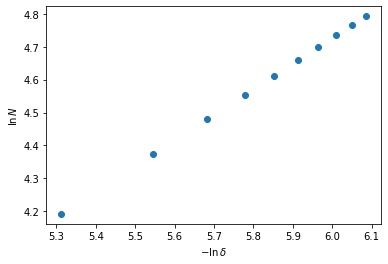

In [115]:
N_log = np.log(N_average)
minus_delta_log = N_log - np.log(M_average)
slope, intercept = np.polyfit(minus_delta_log, N_log, 1)
print(slope)
plt.plot(minus_delta_log, N_log, "o")
plt.xlabel(r"$-\ln\,\delta$")
plt.ylabel(r"$\ln\,N$")

working with realization  0
working with realization  1000
working with realization  2000
working with realization  3000
working with realization  4000
working with realization  5000
working with realization  6000
working with realization  7000
working with realization  8000
working with realization  9000
working with realization  10000
working with realization  11000
working with realization  12000
working with realization  13000
working with realization  14000
working with realization  15000
working with realization  16000
working with realization  17000
working with realization  18000
working with realization  19000
working with realization  20000
working with realization  21000
working with realization  22000
working with realization  23000
working with realization  24000
working with realization  25000
working with realization  26000
working with realization  27000
working with realization  28000
working with realization  29000
working with realization  30000
working with realizat

Text(0, 0.5, '$\\ln\\,N$')

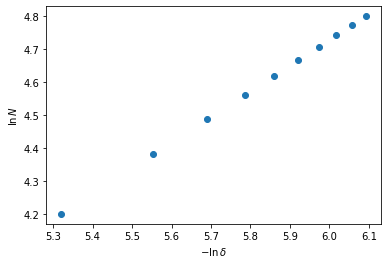

In [143]:
N1_average, M1_average = ensemble_average(100_000, 10_000, 10_000, 100_000)
N1_log = np.log(N1_average)
minus_delta1_log = N1_log - np.log(M1_average)
slope, intercept = np.polyfit(minus_delta1_log, N1_log, 1)
print(slope)
plt.plot(minus_delta1_log, N1_log, "o")
plt.xlabel(r"$-\ln\,\delta$")
plt.ylabel(r"$\ln\,N$")

In [144]:
N1_average

array([ 66.64378,  79.89679,  88.80436,  95.71246, 101.43197, 106.34498,
       110.70476, 114.62996, 118.19314, 121.4715 ])

In [145]:
M1_average

array([0.3257909 , 0.3094736 , 0.30032848, 0.2939811 , 0.28915867,
       0.28528966, 0.28205669, 0.27928051, 0.27686915, 0.27471776])

## Conserved Quantity

In [116]:
fractal_dim = slope

def fractal_length(segment_lengths,flags):

    M_frac = 0

    for i in range(len(flags)):
        if flags[i]:
            M_frac += segment_lengths[i]**fractal_dim
            pass
        pass
    return M_frac

In [117]:
def fractal_value(total_iteration, min_iteration, iteration_step):
    
    lengths = [1.]
    flags = [True]
    frag_prob = [1.] # raw probability, not normalized
    frag_prob_sum = 1.0 # normalization const

    iteration_list = list(range(min_iteration, total_iteration + 1, iteration_step))
    N_realization = []
    M_realization = []
    
    for i in range(total_iteration + 1):
        
        index = pickindex(frag_prob, frag_prob_sum)
        
        if flags[index] == True:

            xL, xR, flag, xLp, xRp, change = splitting(lengths[index])
            
            lengths[index] = xL
            lengths.append(xR)
            flags.append(flag)
            frag_prob[index] = xLp 
            frag_prob.append(xRp)
            frag_prob_sum += change
            pass
        
        if i+1 in iteration_list:
            M_frac = fractal_length(lengths,flags)
            M_realization.append(M_frac)
        pass 
    
    conserved_quantity = np.array(M_realization)
    
    return conserved_quantity

In [118]:
fractal_value(1_000_000, 100_000,100_000)

array([0.93699143, 0.94030037, 0.92224595, 0.89375729, 0.90265875,
       0.91072735, 0.92238865, 0.91813583, 0.92057316, 0.92322798])